In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy.stats import shapiro, kruskal, mannwhitneyu

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import PowerTransformer, OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score,precision_recall_curve, auc

In [ ]:
df=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.shape

(5110, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.isna().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe().round(1)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.0,5110.0,5110.0,5110.0,5110.0,4909.0,5110.0
mean,36517.8,43.2,0.1,0.1,106.1,28.9,0.0
std,21161.7,22.6,0.3,0.2,45.3,7.9,0.2
min,67.0,0.1,0.0,0.0,55.1,10.3,0.0
25%,17741.2,25.0,0.0,0.0,77.2,23.5,0.0
50%,36932.0,45.0,0.0,0.0,91.9,28.1,0.0
75%,54682.0,61.0,0.0,0.0,114.1,33.1,0.0
max,72940.0,82.0,1.0,1.0,271.7,97.6,1.0


In [ ]:
df.corr(numeric_only=True)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
#To remove the trailing whitespace
df.columns=df.columns.str.strip()
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## EDA

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.drop(columns='id',inplace=True)

#### Target

In [ ]:
var='stroke'
df[var].unique()

array([1, 0])

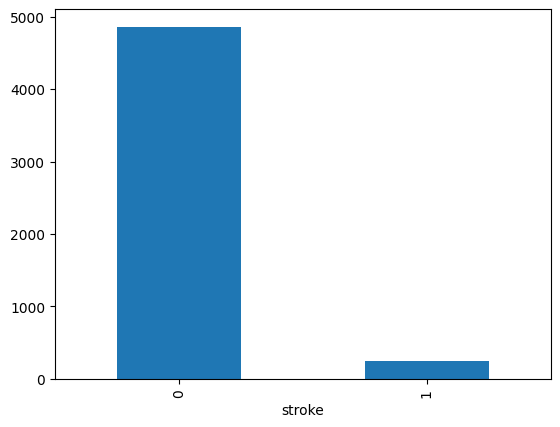

In [ ]:
df[var].value_counts().plot(kind='bar')
plt.show()

In [ ]:
stroke_count=df[var].value_counts()[1]
nostroke_count=df[var].value_counts()[0]

In [ ]:
stroke_count, nostroke_count

(np.int64(249), np.int64(4861))

#### Gender

In [ ]:
var='gender'
df[var].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [ ]:
df=df[df['gender']!='Other']

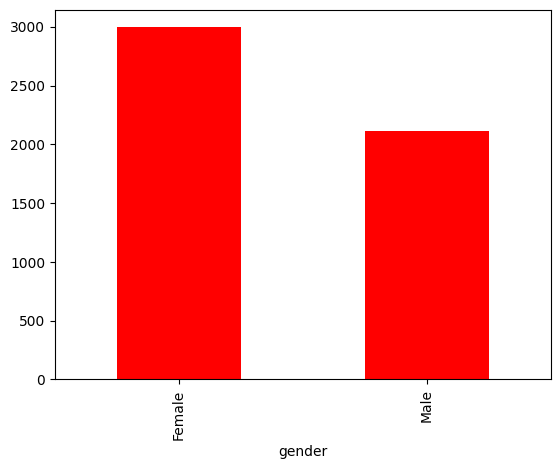

In [ ]:
df[var].value_counts().sort_index().plot(kind='bar',color='red')
plt.show()

In [ ]:
new=pd.crosstab(df[var],df['stroke'])
new

stroke,0,1
gender,,
Female,2853,141
Male,2007,108


In [ ]:
new[1]=new[1]/stroke_count
new[0]=new[0]/nostroke_count
new

stroke,0,1
gender,,
Female,0.586916,0.566265
Male,0.412878,0.433735


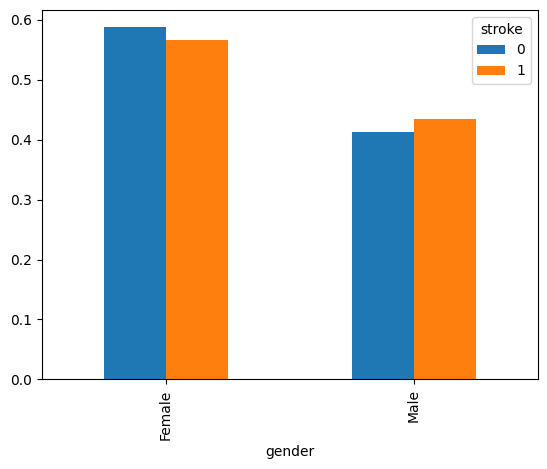

In [ ]:
new.plot(kind='bar')
plt.show()

In [ ]:
chi2_contingency(pd.crosstab(df[var],df['stroke']))

Chi2ContingencyResult(statistic=np.float64(0.340002536046177), pvalue=np.float64(0.5598277580669416), dof=1, expected_freq=array([[2848.07985907,  145.92014093],
       [2011.92014093,  103.07985907]]))

In [ ]:
df.drop(columns='gender',inplace=True)

#### Age

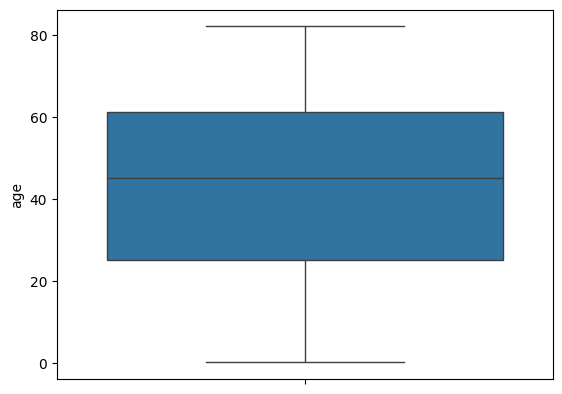

In [ ]:
var='age'
sns.boxplot(y=df[var])
plt.show()

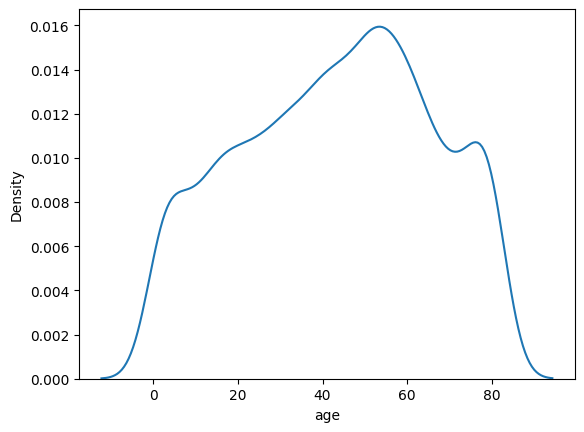

In [ ]:
sns.kdeplot(df[var])
plt.show()

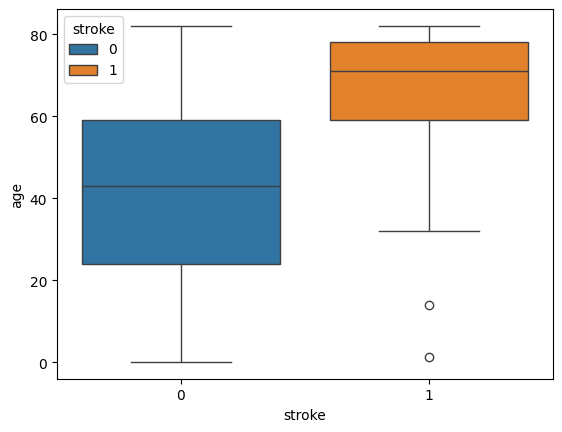

In [ ]:
sns.boxplot(y=df[var],x=df['stroke'],hue=df['stroke'])
plt.show()

In [ ]:
# Assumption checking for t-test
# Normality between all classes
for status in df['stroke'].unique():
  group_data=df[df['stroke']==status][var]
  stat, p= shapiro(group_data)
  print(f"Normality Test for {status}: p-value = {p}")

Normality Test for 1: p-value = 3.173724865197424e-13
Normality Test for 0: p-value = 1.6171633266515144e-30


In [ ]:
# Since data is not normal, we will try the non-parametric method
#Mann Whitney U
grouped = [df[df['stroke'] == status][var] for status in df['stroke'].unique()]
stat, p_value = mannwhitneyu(*grouped)
print(f"Mann Whitney U Test: p-value = {p_value}")

Mann Whitney U Test: p-value = 3.8497341579673305e-71


#### Hypertension

In [ ]:
var='hypertension'
df[var].unique()

array([0, 1])

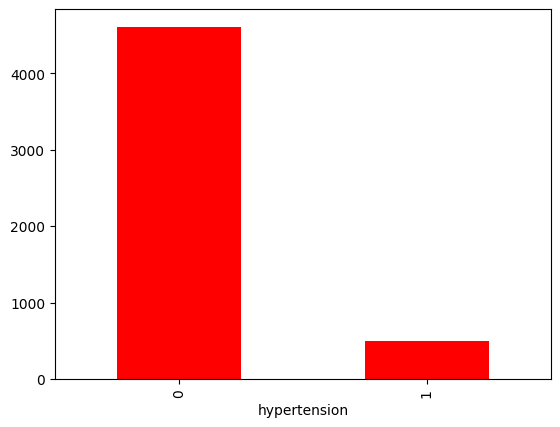

In [ ]:
df[var].value_counts().sort_index().plot(kind='bar',color='red')
plt.show()

In [ ]:
new=pd.crosstab(df[var],df['stroke'])
new

stroke,0,1
hypertension,,
0,4428,183
1,432,66


In [ ]:
new[1]=new[1]/stroke_count
new[0]=new[0]/nostroke_count
new

stroke,0,1
hypertension,,
0,0.910924,0.73494
1,0.088871,0.26506


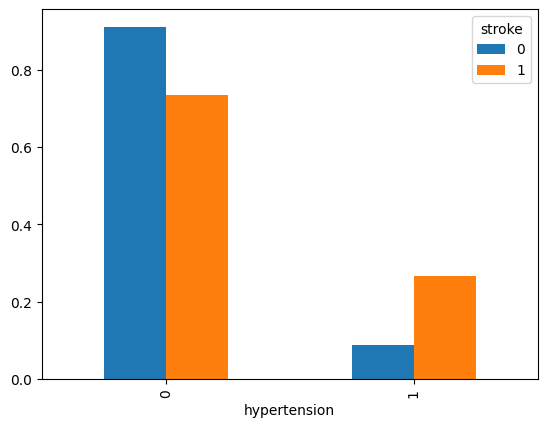

In [ ]:
new.plot(kind='bar')
plt.show()

In [ ]:
chi2_contingency(pd.crosstab(df[var],df['stroke']))

Chi2ContingencyResult(statistic=np.float64(81.57314462043591), pvalue=np.float64(1.688936253410575e-19), dof=1, expected_freq=array([[4386.27128597,  224.72871403],
       [ 473.72871403,   24.27128597]]))

#### Heart Disease

In [ ]:
var='heart_disease'
df[var].unique()

array([1, 0])

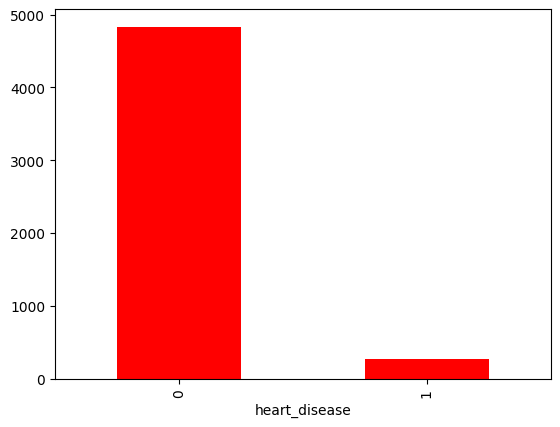

In [ ]:
df[var].value_counts().sort_index().plot(kind='bar',color='red')
plt.show()

In [ ]:
new=pd.crosstab(df[var],df['stroke'])
new

stroke,0,1
heart_disease,,
0,4631,202
1,229,47


In [ ]:
new[1]=new[1]/stroke_count
new[0]=new[0]/nostroke_count
new

stroke,0,1
heart_disease,,
0,0.952685,0.811245
1,0.047110,0.188755


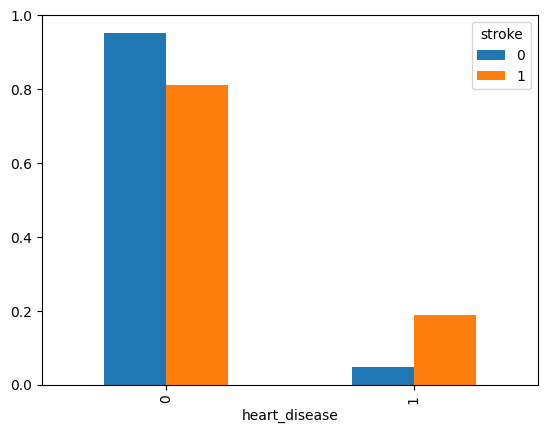

In [ ]:
new.plot(kind='bar')
plt.show()

In [ ]:
chi2_contingency(pd.crosstab(df[var],df['stroke']))

Chi2ContingencyResult(statistic=np.float64(90.22943664078221), pvalue=np.float64(2.120831133146208e-21), dof=1, expected_freq=array([[4597.45155608,  235.54844392],
       [ 262.54844392,   13.45155608]]))

#### Ever Married

In [ ]:
var='ever_married'
df[var].unique()

array(['Yes', 'No'], dtype=object)

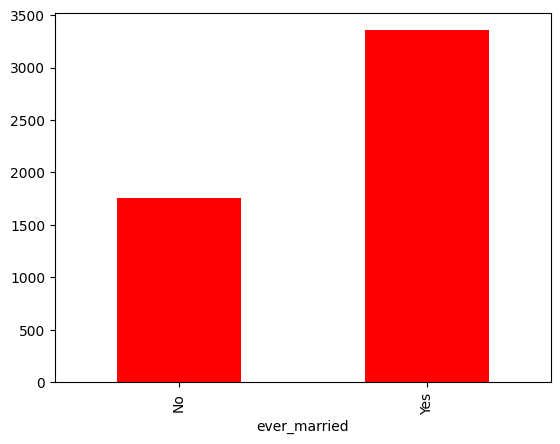

In [ ]:
df[var].value_counts().sort_index().plot(kind='bar',color='red')
plt.show()

In [ ]:
new=pd.crosstab(df[var],df['stroke'])
new

stroke,0,1
ever_married,,
No,1727,29
Yes,3133,220


In [ ]:
new[1]=new[1]/stroke_count
new[0]=new[0]/nostroke_count
new

stroke,0,1
ever_married,,
No,0.355277,0.116466
Yes,0.644518,0.883534


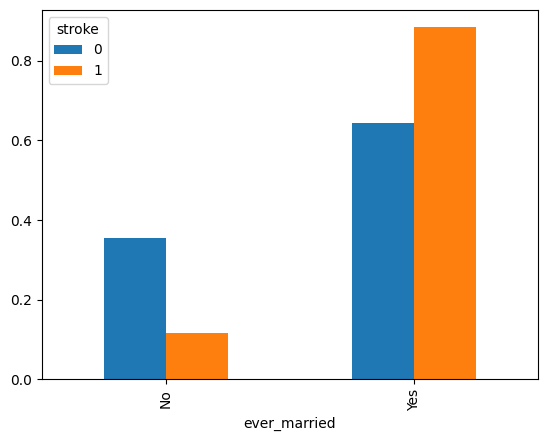

In [ ]:
new.plot(kind='bar')
plt.show()

In [ ]:
chi2_contingency(pd.crosstab(df[var],df['stroke']))

Chi2ContingencyResult(statistic=np.float64(58.86780922483486), pvalue=np.float64(1.6862856191673454e-14), dof=1, expected_freq=array([[1670.41691133,   85.58308867],
       [3189.58308867,  163.41691133]]))

#### Work Type

In [ ]:
var='work_type'
df[var].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

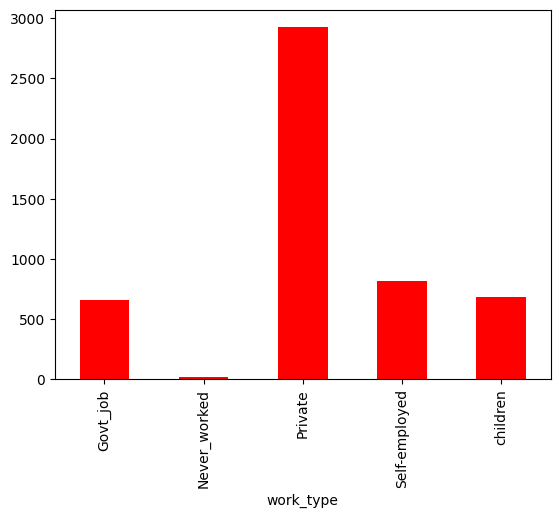

In [ ]:
df[var].value_counts().sort_index().plot(kind='bar',color='red')
plt.show()

In [ ]:
new=pd.crosstab(df[var],df['stroke'])
new

stroke,0,1
work_type,,
Govt_job,624,33
Never_worked,22,0
Private,2775,149
Self-employed,754,65
children,685,2


In [ ]:
new[1]=new[1]/stroke_count
new[0]=new[0]/nostroke_count
new

stroke,0,1
work_type,,
Govt_job,0.128369,0.132530
Never_worked,0.004526,0.000000
Private,0.570870,0.598394
Self-employed,0.155112,0.261044
children,0.140918,0.008032


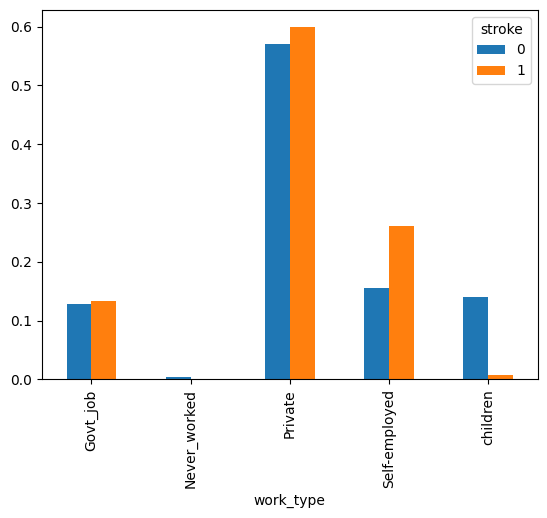

In [ ]:
new.plot(kind='bar')
plt.show()

In [ ]:
chi2_contingency(pd.crosstab(df[var],df['stroke']))

Chi2ContingencyResult(statistic=np.float64(49.1591485868476), pvalue=np.float64(5.40903546949726e-10), dof=4, expected_freq=array([[6.24979448e+02, 3.20205520e+01],
       [2.09277745e+01, 1.07222548e+00],
       [2.78149149e+03, 1.42508514e+02],
       [7.79083969e+02, 3.99160305e+01],
       [6.53517322e+02, 3.34826776e+01]]))

#### Residence Type

In [ ]:
var='Residence_type'
df[var].unique()

array(['Urban', 'Rural'], dtype=object)

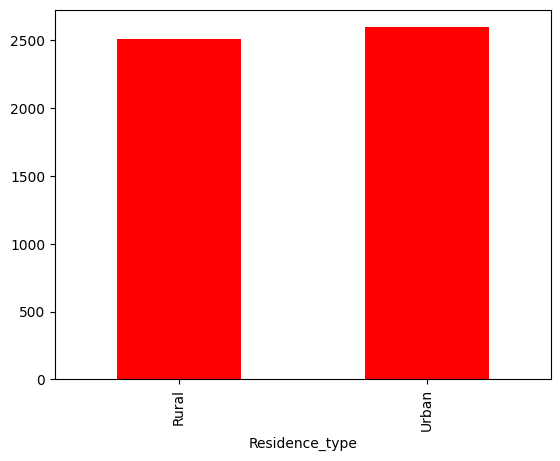

In [ ]:
df[var].value_counts().sort_index().plot(kind='bar',color='red')
plt.show()

In [ ]:
new=pd.crosstab(df[var],df['stroke'])
new

stroke,0,1
Residence_type,,
Rural,2399,114
Urban,2461,135


In [ ]:
new[1]=new[1]/stroke_count
new[0]=new[0]/nostroke_count
new

stroke,0,1
Residence_type,,
Rural,0.493520,0.457831
Urban,0.506274,0.542169


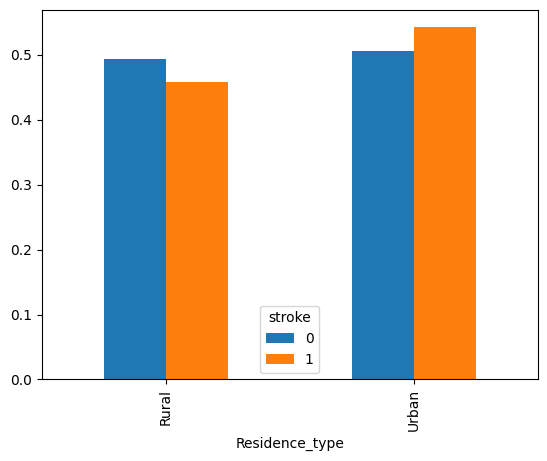

In [ ]:
new.plot(kind='bar')
plt.show()

In [ ]:
chi2_contingency(pd.crosstab(df[var],df['stroke']))

Chi2ContingencyResult(statistic=np.float64(1.0749713079092142), pvalue=np.float64(0.29982523877153633), dof=1, expected_freq=array([[2390.52260716,  122.47739284],
       [2469.47739284,  126.52260716]]))

In [ ]:
df.drop(columns='Residence_type',inplace=True)

#### Average Glucose level

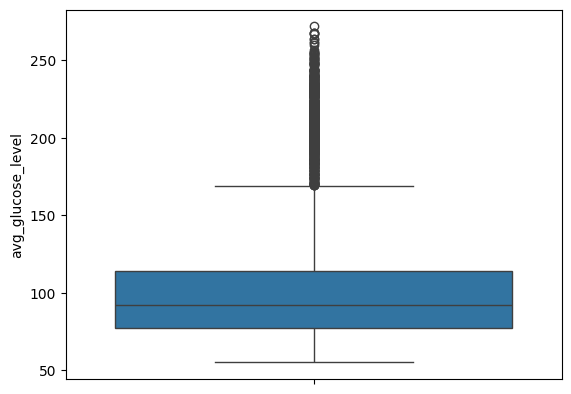

In [ ]:
var='avg_glucose_level'
sns.boxplot(y=df[var])
plt.show()

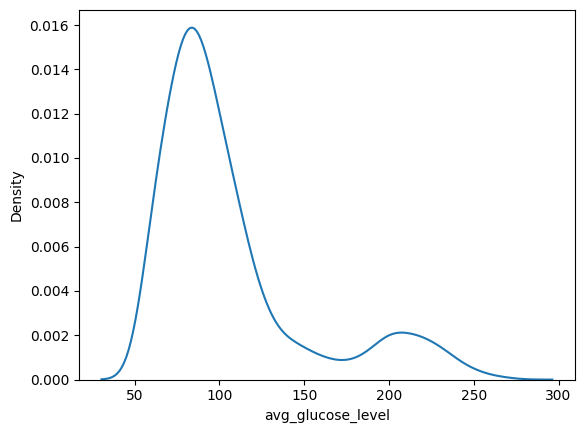

In [ ]:
sns.kdeplot(df[var])
plt.show()

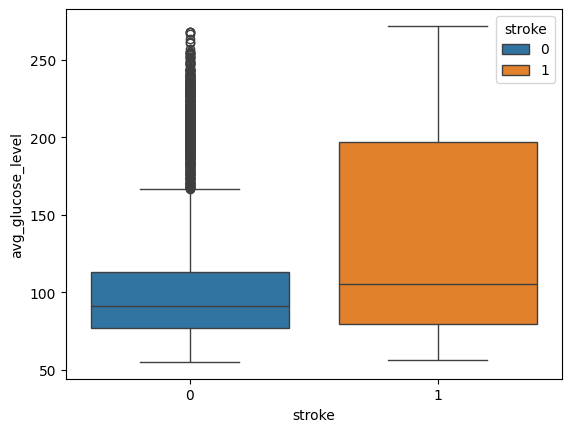

In [ ]:
sns.boxplot(y=df[var],x=df['stroke'],hue=df['stroke'])
plt.show()

In [ ]:
# Assumption checking for t-test
# Normality between all classes
for status in df['stroke'].unique():
  group_data=df[df['stroke']==status][var]
  stat, p= shapiro(group_data)
  print(f"Normality Test for {status}: p-value = {p}")

Normality Test for 1: p-value = 1.2319525411457356e-13
Normality Test for 0: p-value = 1.1209681897858829e-60


In [ ]:
# Since data is not normal, we will try the non-parametric method
#Mann Whitney U
grouped = [df[df['stroke'] == status][var] for status in df['stroke'].unique()]
stat, p_value = mannwhitneyu(*grouped)
print(f"Mann Whitney U Test: p-value = {p_value}")

Mann Whitney U Test: p-value = 3.583094987269707e-09


#### BMI

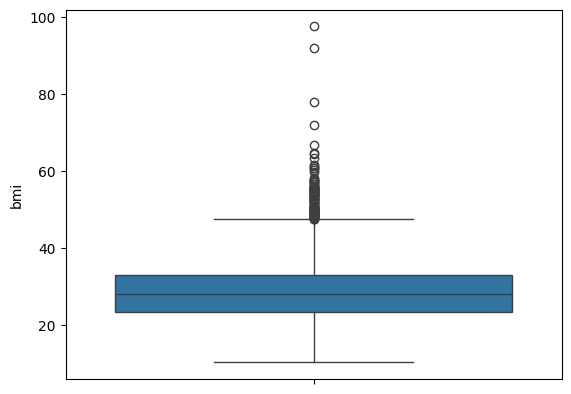

In [ ]:
var='bmi'
sns.boxplot(y=df[var])
plt.show()

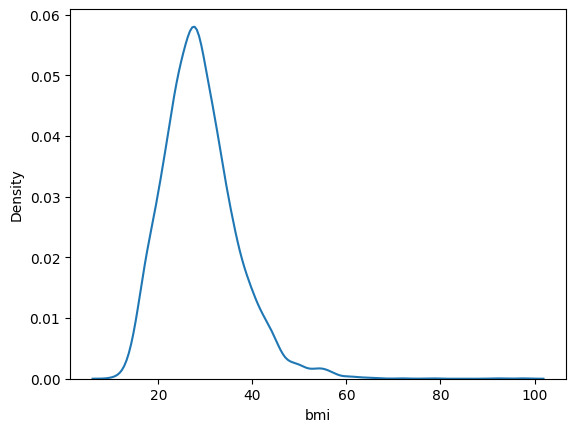

In [ ]:
sns.kdeplot(df[var])
plt.show()

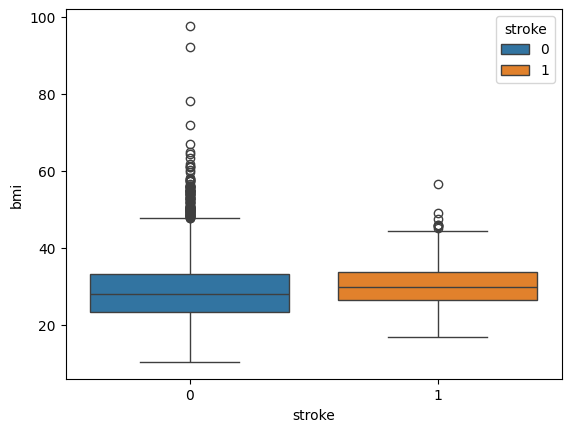

In [ ]:
sns.boxplot(y=df[var],x=df['stroke'],hue=df['stroke'])
plt.show()

In [ ]:
# Assumption checking for t-test
# Normality between all classes
for status in df['stroke'].unique():
  group_data=(df[df['stroke']==status][var]).dropna()
  stat, p= shapiro(group_data)
  print(f"Normality Test for {status}: p-value = {p}")

Normality Test for 1: p-value = 5.2359311191139395e-06
Normality Test for 0: p-value = 1.3988171897146278e-36


In [ ]:
# Since data is not normal, we will try the non-parametric method
#Mann Whitney U
grouped = [df[df['stroke'] == status][var].dropna() for status in df['stroke'].unique()]
stat, p_value = mannwhitneyu(*grouped)
print(f"Mann Whitney U Test: p-value = {p_value}")

Mann Whitney U Test: p-value = 0.00010418772123808268


#### Smoking status

In [ ]:
var='smoking_status'
df[var].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

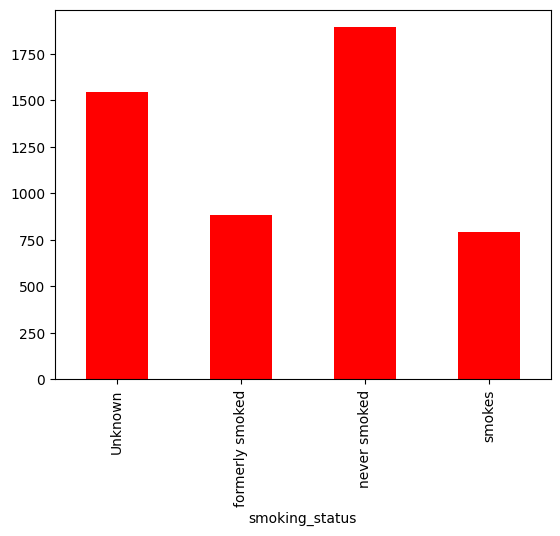

In [ ]:
df[var].value_counts().sort_index().plot(kind='bar',color='red')
plt.show()

In [ ]:
new=pd.crosstab(df[var],df['stroke'])
new

stroke,0,1
smoking_status,,
Unknown,1497,47
formerly smoked,814,70
never smoked,1802,90
smokes,747,42


In [ ]:
new[1]=new[1]/stroke_count
new[0]=new[0]/nostroke_count
new

stroke,0,1
smoking_status,,
Unknown,0.307961,0.188755
formerly smoked,0.167455,0.281124
never smoked,0.370706,0.361446
smokes,0.153672,0.168675


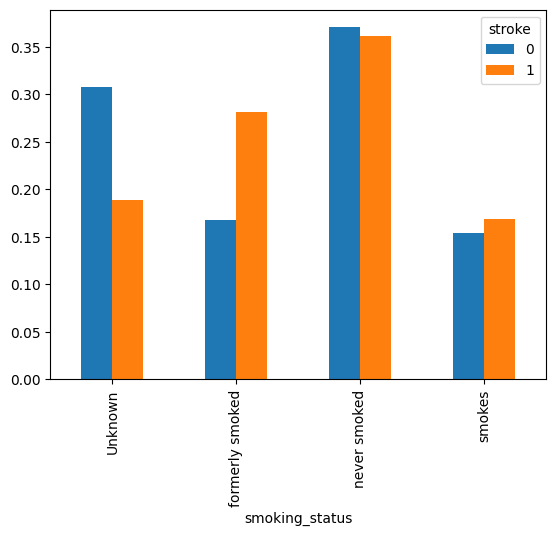

In [ ]:
new.plot(kind='bar')
plt.show()

In [ ]:
chi2_contingency(pd.crosstab(df[var],df['stroke']))

Chi2ContingencyResult(statistic=np.float64(29.22572707549827), pvalue=np.float64(2.0077041756108317e-06), dof=3, expected_freq=array([[1468.749266  ,   75.250734  ],
       [ 840.91603053,   43.08396947],
       [1799.78860834,   92.21139166],
       [ 750.54609513,   38.45390487]]))

#Missing value imputation and preprocessing

In [ ]:
X=df.drop(columns=['stroke'])
Y=df['stroke']

In [ ]:
transform=ColumnTransformer([
    ('sc',StandardScaler(),['age','avg_glucose_level','bmi']),
    ('ohe',OneHotEncoder(drop='first',sparse_output=True),['ever_married','work_type','smoking_status'])
],remainder='passthrough')

In [ ]:
X_transformed = transform.fit_transform(X)

In [ ]:
transform.get_feature_names_out()

array(['sc__age', 'sc__avg_glucose_level', 'sc__bmi',
       'ohe__ever_married_Yes', 'ohe__work_type_Never_worked',
       'ohe__work_type_Private', 'ohe__work_type_Self-employed',
       'ohe__work_type_children', 'ohe__smoking_status_formerly smoked',
       'ohe__smoking_status_never smoked', 'ohe__smoking_status_smokes',
       'remainder__hypertension', 'remainder__heart_disease'],
      dtype=object)

In [ ]:
X_transformed=pd.DataFrame(X_transformed,
               columns=['age', 'avg_glucose_level', 'bmi',
       'ever_married_Yes', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed',
       'work_type_children', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes',
       'hypertension', 'heart_disease'])

In [ ]:
imputer = KNNImputer(n_neighbors=5)
X_imputed = pd.DataFrame(imputer.fit_transform(X_transformed),columns=X_transformed.columns)

In [ ]:
X_imputed.isna().sum()

,0
age,0
avg_glucose_level,0
bmi,0
ever_married_Yes,0
work_type_Never_worked,0
work_type_Private,0
work_type_Self-employed,0
work_type_children,0
smoking_status_formerly smoked,0
smoking_status_never smoked,0


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X_imputed,Y,test_size=0.2,random_state=2)
xtrain.shape, xtest.shape

((4087, 13), (1022, 13))

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = xtrain.columns
vif_data["VIF"] = [variance_inflation_factor(xtrain.values, i)
                   for i in range(xtrain.shape[1])]
print(vif_data)

                           feature       VIF
0                              age  2.796875
1                avg_glucose_level  1.111685
2                              bmi  1.320723
3                 ever_married_Yes  4.334677
4           work_type_Never_worked  1.029515
5                work_type_Private  3.131658
6          work_type_Self-employed  1.690122
7               work_type_children  2.188095
8   smoking_status_formerly smoked  1.702237
9      smoking_status_never smoked  2.274638
10           smoking_status_smokes  1.563826
11                    hypertension  1.231085
12                   heart_disease  1.164561


In [ ]:
smote = SMOTE(random_state=42, sampling_strategy=1.0)  # 1.0 means fully balanced
X_train_resampled, y_train_resampled = smote.fit_resample(xtrain, ytrain)

print("Before SMOTE:", pd.DataFrame(ytrain).value_counts())
print("After SMOTE:", pd.DataFrame(y_train_resampled).value_counts())

Before SMOTE: stroke
0         3889
1          198
Name: count, dtype: int64
After SMOTE: stroke
0         3889
1         3889
Name: count, dtype: int64


In [ ]:
perfect_corr =np.where(X_train_resampled.corr() >= 0.9)
perfect_pairs = [(X_train_resampled.corr().index[x], X_train_resampled.corr().columns[y]) for x, y in zip(*perfect_corr) if x != y and x < y]
print("Perfectly correlated feature pairs:", perfect_pairs)

Perfectly correlated feature pairs: []


In [ ]:
rank = np.linalg.matrix_rank(X_train_resampled.values)
print("Matrix rank:", rank)
print("Number of columns:", X_train_resampled.shape[1])

Matrix rank: 13
Number of columns: 13


In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_resampled.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_resampled.values, i)
                   for i in range(X_train_resampled.shape[1])]
print(vif_data)

                           feature       VIF
0                              age  3.291610
1                avg_glucose_level  1.327801
2                              bmi  1.278498
3                 ever_married_Yes  6.368733
4           work_type_Never_worked  1.017294
5                work_type_Private  3.776847
6          work_type_Self-employed  2.227019
7               work_type_children  1.714175
8   smoking_status_formerly smoked  2.124839
9      smoking_status_never smoked  2.466406
10           smoking_status_smokes  1.712312
11                    hypertension  1.355870
12                   heart_disease  1.356441


# Logistic Regression

In [ ]:
x=sm.add_constant(X_train_resampled)

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                   for i in range(x.shape[1])]
print(vif_data)

                           feature        VIF
0                            const  18.237851
1                              age   2.577525
2                avg_glucose_level   1.276753
3                              bmi   1.271086
4                 ever_married_Yes   1.847256
5           work_type_Never_worked   1.043602
6                work_type_Private   2.463243
7          work_type_Self-employed   2.315771
8               work_type_children   2.643001
9   smoking_status_formerly smoked   1.780975
10     smoking_status_never smoked   1.874795
11           smoking_status_smokes   1.570530
12                    hypertension   1.134075
13                   heart_disease   1.210794


In [ ]:
model = sm.Logit(y_train_resampled, x).fit_regularized(method='l1',alpha=0.01)
model.summary2()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.4646019686110937
            Iterations: 257
            Function evaluations: 257
            Gradient evaluations: 257


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
================================================================================
Model:                    Logit                 Method:                MLE      
Dependent Variable:       stroke                Pseudo R-squared:      0.330    
Date:                     2025-08-17 10:39      AIC:                   7255.1311
No. Observations:         7778                  BIC:                   7352.5579
Df Model:                 13                    Log-Likelihood:        -3613.6  
Df Residuals:             7764                  LL-Null:               -5391.3  
Converged:                1.0000                LLR p-value:           0.0000   
No. Iterations:           257.0000              Scale:                 1.0000   
--------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
--------------------------------------------------------------------------------
const                          -1.7248   0.1348 -12.7935 0.0000  -1.9890 -1.4605
age                             2.0790   0.0585  35.5514 0.0000   1.9644  2.1936
avg_glucose_level               0.1029   0.0265   3.8781 0.0001   0.0509  0.1549
bmi                             0.0223   0.0404   0.5523 0.5808  -0.0569  0.1015
ever_married_Yes                0.2414   0.1067   2.2614 0.0237   0.0322  0.4506
work_type_Never_worked         -3.2038  10.0022  -0.3203 0.7487 -22.8078 16.4003
work_type_Private               0.2655   0.0898   2.9562 0.0031   0.0895  0.4416
work_type_Self-employed        -0.4127   0.1063  -3.8822 0.0001  -0.6211 -0.2044
work_type_children              1.8895   0.2814   6.7156 0.0000   1.3380  2.4409
smoking_status_formerly smoked  0.0186   0.0914   0.2036 0.8387  -0.1605  0.1977
smoking_status_never smoked    -0.2096   0.0853  -2.4563 0.0140  -0.3768 -0.0424
smoking_status_smokes           0.3394   0.1008   3.3656 0.0008   0.1417  0.5370
hypertension                    0.2195   0.0865   2.5366 0.0112   0.0499  0.3891
heart_disease                   0.1272   0.1060   1.1995 0.2303  -0.0806  0.3350
================================================================================

"""

In [ ]:
logit = np.log(model.predict(sm.add_constant((X_train_resampled))) / (1 - model.predict(sm.add_constant((X_train_resampled)))))

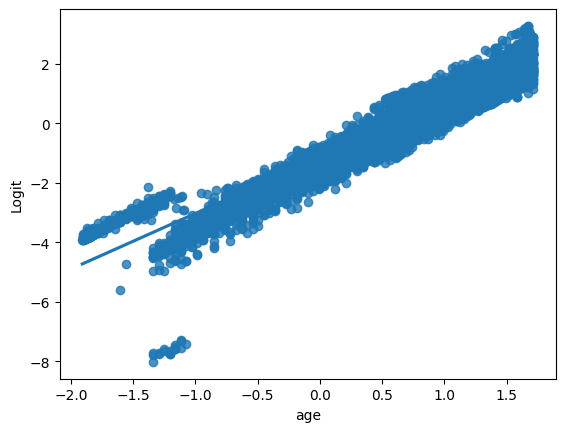

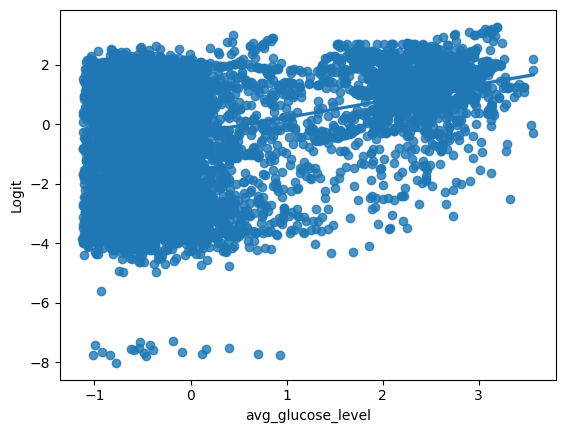

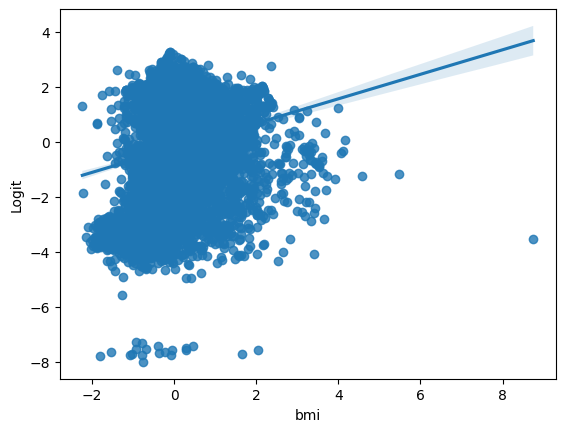

In [ ]:
continuous_features=['age','avg_glucose_level','bmi']
for var in continuous_features:
  sns.regplot(x=X_train_resampled[var], y=logit)
  plt.xlabel(var)
  plt.ylabel('Logit')
  plt.show()

In [ ]:
x_cont=xtrain[continuous_features]
x_cont_const = sm.add_constant(x_cont).reset_index(drop=True)
ytrain_reset = ytrain.reset_index(drop=True)

# Create interaction terms X*log(X)
for col in x_cont.columns:
    X_pos = x_cont_const[col] + abs(x_cont_const[col].min()) + 1e-5
    x_cont_const[col + '_log'] = X_pos * np.log(X_pos)

# Fit logistic regression
model = sm.Logit(ytrain_reset, x_cont_const).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.155258
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 4087
Model:                          Logit   Df Residuals:                     4080
Method:                           MLE   Df Model:                            6
Date:                Sun, 17 Aug 2025   Pseudo R-squ.:                  0.1993
Time:                        10:39:58   Log-Likelihood:                -634.54
converged:                       True   LL-Null:                       -792.53
Covariance Type:            nonrobust   LLR p-value:                 3.077e-65
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.6757      1.123     -2.383      0.017      -4.876      -0

In [ ]:
model = sm.Logit(y_train_resampled, x).fit_regularized(method='l1',alpha=0.01)
model.summary2()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.4646019686110937
            Iterations: 257
            Function evaluations: 257
            Gradient evaluations: 257


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
================================================================================
Model:                    Logit                 Method:                MLE      
Dependent Variable:       stroke                Pseudo R-squared:      0.330    
Date:                     2025-08-17 10:39      AIC:                   7255.1311
No. Observations:         7778                  BIC:                   7352.5579
Df Model:                 13                    Log-Likelihood:        -3613.6  
Df Residuals:             7764                  LL-Null:               -5391.3  
Converged:                1.0000                LLR p-value:           0.0000   
No. Iterations:           257.0000              Scale:                 1.0000   
--------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
--------------------------------------------------------------------------------
const                          -1.7248   0.1348 -12.7935 0.0000  -1.9890 -1.4605
age                             2.0790   0.0585  35.5514 0.0000   1.9644  2.1936
avg_glucose_level               0.1029   0.0265   3.8781 0.0001   0.0509  0.1549
bmi                             0.0223   0.0404   0.5523 0.5808  -0.0569  0.1015
ever_married_Yes                0.2414   0.1067   2.2614 0.0237   0.0322  0.4506
work_type_Never_worked         -3.2038  10.0022  -0.3203 0.7487 -22.8078 16.4003
work_type_Private               0.2655   0.0898   2.9562 0.0031   0.0895  0.4416
work_type_Self-employed        -0.4127   0.1063  -3.8822 0.0001  -0.6211 -0.2044
work_type_children              1.8895   0.2814   6.7156 0.0000   1.3380  2.4409
smoking_status_formerly smoked  0.0186   0.0914   0.2036 0.8387  -0.1605  0.1977
smoking_status_never smoked    -0.2096   0.0853  -2.4563 0.0140  -0.3768 -0.0424
smoking_status_smokes           0.3394   0.1008   3.3656 0.0008   0.1417  0.5370
hypertension                    0.2195   0.0865   2.5366 0.0112   0.0499  0.3891
heart_disease                   0.1272   0.1060   1.1995 0.2303  -0.0806  0.3350
================================================================================

"""

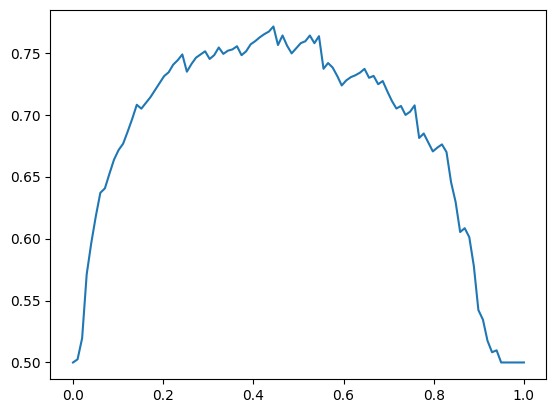

In [ ]:
s=[]
for threshold in np.linspace(start=0,stop=1,num=100):
  ypred=(model.predict(sm.add_constant(xtest))>threshold).astype(int)
  s.append(roc_auc_score(ytest,ypred))
  #print(threshold)
  #print(accuracy_score(ytest,ypred))
  #print(f1_score(ytest,ypred))
  #print(roc_auc_score(ytest,ypred))
  #print(confusion_matrix(ytest,ypred))
plt.plot(np.linspace(start=0,stop=1,num=100),s)
plt.show()

In [ ]:
ypred=(model.predict(sm.add_constant(xtest))>np.linspace(start=0,stop=1,num=100)[np.argmax(s)]).astype(int)
print(threshold)
print(accuracy_score(ytest,ypred))
print(f1_score(ytest,ypred))
print(roc_auc_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))

1.0
0.6888454011741683
0.21674876847290642
0.7712283677631712
[[660 311]
 [  7  44]]


# KNN

In [ ]:
scores=[]
for i in range(1,20):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(xtrain,ytrain)
  ypred=knn.predict(xtest)
  scores.append(accuracy_score(ytest,ypred))

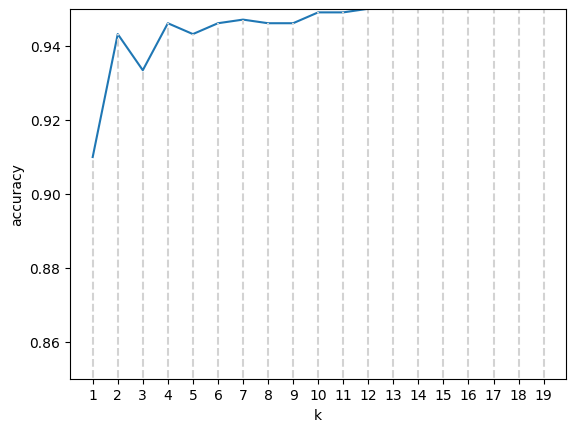

In [ ]:
plt.plot(range(1,20),scores)
plt.xlabel("k")
plt.vlines(range(1, 20), 0, scores, color='lightgrey', linestyle='--')
plt.xticks(range(1,20))
plt.ylabel("accuracy")
plt.ylim(0.85,0.95)
plt.show()

In [ ]:
max(scores)

0.9500978473581213

In [ ]:
for i in range(1,20):
  if scores[i-1]==max(scores):
    print('k=',i)
    print('max score=',scores[i-1])
    break


k= 12
max score= 0.9500978473581213


In [ ]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1, 21)), 'weights': ['uniform', 'distance']}  # distance weighting can help minority

# 4. GridSearchCV with F1-score for minority
grid = GridSearchCV(knn, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1)
grid.fit(xtrain, ytrain)

# 5. Best parameters
print("Best params:", grid.best_params_)
print("Best F1 (CV):", grid.best_score_)

# 6. Evaluate on test set
best_knn = grid.best_estimator_
y_prob_test = best_knn.predict_proba(xtest)[:,1]
s=[]
for threshold in np.linspace(start=0,stop=1,num=100):
  ypred=(y_prob_test>threshold).astype(int)
  s.append(roc_auc_score(ytest,ypred))
threshold=np.linspace(start=0,stop=1,num=100)[np.argmax(s)]

# Optional: threshold tuning
y_pred_test = (y_prob_test > threshold).astype(int)

# Metrics
f1 = f1_score(ytest, y_pred_test)
precision, recall, _ = precision_recall_curve(ytest, y_prob_test)
pr_auc = auc(recall, precision)
cm = confusion_matrix(ytest, y_pred_test)

y_prob_train = best_lr.predict_proba(xtrain)[:,1]
y_pred_train = (y_prob_train > threshold).astype(int)
print("\n--- Train Metrics ---")
print("Accuracy (train):", accuracy_score(ytrain, y_pred_train))
print("F1-score (train):", f1_score(ytrain, y_pred_train))
print("ROC-AUC (train):", roc_auc_score(ytrain, y_prob_train))  # use probabilities
print("\n--- Test Metrics ---")

print("F1-score:", f1)
print("PR-AUC:", pr_auc)
print("Confusion Matrix:\n", cm)
print("ROC-AUC:", roc_auc_score(ytest, y_pred_test))

Best params: {'n_neighbors': 1, 'weights': 'uniform'}
Best F1 (CV): 0.14724537841725807

--- Train Metrics ---
Accuracy (train): 0.048446293124541226
F1-score (train): 0.09241540256709452
ROC-AUC (train): 0.8456109046235042

--- Test Metrics ---
F1-score: 0.08
PR-AUC: 0.10302614196363477
Confusion Matrix:
 [[926  45]
 [ 47   4]]
ROC-AUC: 0.5160436986329031


In [ ]:
cross_val_score(best_knn,pd.DataFrame(pd.concat([xtrain,xtest])),pd.DataFrame(pd.concat([pd.DataFrame(ytrain),pd.DataFrame(ytest)])),cv=5,n_jobs=-1)

array([0.90410959, 0.91291585, 0.91291585, 0.91878669, 0.91185113])

# Decision Tree

In [ ]:
dt = DecisionTreeClassifier(random_state=2, class_weight='balanced')
param_grid = {
    'max_depth':[10,15,20,25],
    'max_features':[0.5,0.75,1],
    'min_samples_leaf':[2,5,10],
    'min_samples_split':[5,10,15,20]
}

# 4. GridSearchCV with F1-score
grid = GridSearchCV(dt, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1)
grid.fit(xtrain, ytrain)

# 5. Best parameters
print("Best params:", grid.best_params_)
print("Best F1 (CV):", grid.best_score_)

# 6. Evaluate on test set
best_dt = grid.best_estimator_
y_prob_test = best_dt.predict_proba(xtest)[:,1]  # probabilities for positive class
s=[]
for threshold in np.linspace(start=0,stop=1,num=100):
  ypred=(y_prob_test>threshold).astype(int)
  s.append(roc_auc_score(ytest,ypred))
threshold=np.linspace(start=0,stop=1,num=100)[np.argmax(s)]

# Optional: Threshold tuning
y_pred_test = (y_prob_test > threshold).astype(int)

# 7. Metrics
f1 = f1_score(ytest, y_pred_test)
precision, recall, _ = precision_recall_curve(ytest, y_prob_test)
pr_auc = auc(recall, precision)
cm = confusion_matrix(ytest, y_pred_test)

y_prob_train = best_lr.predict_proba(xtrain)[:,1]
y_pred_train = (y_prob_train > threshold).astype(int)
print("\n--- Train Metrics ---")
print("Accuracy (train):", accuracy_score(ytrain, y_pred_train))
print("F1-score (train):", f1_score(ytrain, y_pred_train))
print("ROC-AUC (train):", roc_auc_score(ytrain, y_prob_train))  # use probabilities
print("\n--- Test Metrics ---")

print("F1-score:", f1)
print("PR-AUC:", pr_auc)
print("Confusion Matrix:\n", cm)
print("ROC-AUC:", roc_auc_score(ytest, y_pred_test))

Best params: {'max_depth': 10, 'max_features': 1, 'min_samples_leaf': 2, 'min_samples_split': 20}
Best F1 (CV): 0.22151372244306952

--- Train Metrics ---
Accuracy (train): 0.8382676780034255
F1-score (train): 0.27122381477398017
ROC-AUC (train): 0.8456109046235042

--- Test Metrics ---
F1-score: 0.2601626016260163
PR-AUC: 0.14441255254512478
Confusion Matrix:
 [[808 163]
 [ 19  32]]
ROC-AUC: 0.7297914016275923


In [ ]:
pd.DataFrame(best_dt.feature_importances_,xtrain.columns)

,0
age,0.541456
avg_glucose_level,0.132069
bmi,0.085077
ever_married_Yes,0.074160
work_type_Never_worked,0.000000
work_type_Private,0.008527
work_type_Self-employed,0.009486
work_type_children,0.004091
smoking_status_formerly smoked,0.016841
smoking_status_never smoked,0.017138


In [ ]:
cross_val_score(best_dt,pd.DataFrame(pd.concat([xtrain,xtest])),pd.DataFrame(pd.concat([pd.DataFrame(ytrain),pd.DataFrame(ytest)])),cv=5,n_jobs=-1)

array([0.74168297, 0.79941292, 0.72994129, 0.76320939, 0.77277179])

# Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=2, class_weight='balanced')
param_grid = {
    'n_estimators':[100,200,500],
    'max_depth':[10,15,20,25],
    'max_features':[0.5,0.75,1],
    'min_samples_leaf':[2,5,10],
    'min_samples_split':[5,10,15,20]
}

# 4. GridSearchCV with F1-score
grid = GridSearchCV(rf, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=2)
grid.fit(xtrain, ytrain)

# 5. Best parameters
print("Best params:", grid.best_params_)
print("Best F1 (CV):", grid.best_score_)

# 6. Evaluate on test set
best_rf = grid.best_estimator_
y_prob_test = best_rf.predict_proba(xtest)[:,1]  # probabilities for positive class
s=[]
for threshold in np.linspace(start=0,stop=1,num=100):
  ypred=(y_prob_test>threshold).astype(int)
  s.append(roc_auc_score(ytest,ypred))
threshold=np.linspace(start=0,stop=1,num=100)[np.argmax(s)]
# Optional: Threshold tuning
y_pred_test = (y_prob_test > threshold).astype(int)

# 7. Metrics
f1 = f1_score(ytest, y_pred_test)
precision, recall, _ = precision_recall_curve(ytest, y_prob_test)
pr_auc = auc(recall, precision)
cm = confusion_matrix(ytest, y_pred_test)

y_prob_train = best_lr.predict_proba(xtrain)[:,1]
y_pred_train = (y_prob_train > threshold).astype(int)
print("\n--- Train Metrics ---")
print("Accuracy (train):", accuracy_score(ytrain, y_pred_train))
print("F1-score (train):", f1_score(ytrain, y_pred_train))
print("ROC-AUC (train):", roc_auc_score(ytrain, y_prob_train))  # use probabilities
print("\n--- Test Metrics ---")

print("F1-score:", f1)
print("PR-AUC:", pr_auc)
print("Confusion Matrix:\n", cm)
print("ROC-AUC:", roc_auc_score(ytest, y_pred_test))

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best params: {'max_depth': 10, 'max_features': 1, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 100}
Best F1 (CV): 0.28273432359996925

--- Train Metrics ---
Accuracy (train): 0.5789087350134573
F1-score (train): 0.17694882831181252
ROC-AUC (train): 0.8456109046235042

--- Test Metrics ---
F1-score: 0.224
PR-AUC: 0.15181935991124007
Confusion Matrix:
 [[689 282]
 [  9  42]]
ROC-AUC: 0.7665535833282849


In [ ]:
pd.DataFrame(best_rf.feature_importances_,xtrain.columns)

,0
age,0.427064
avg_glucose_level,0.171403
bmi,0.168151
ever_married_Yes,0.063378
work_type_Never_worked,0.001277
work_type_Private,0.013161
work_type_Self-employed,0.016559
work_type_children,0.020503
smoking_status_formerly smoked,0.018929
smoking_status_never smoked,0.016602


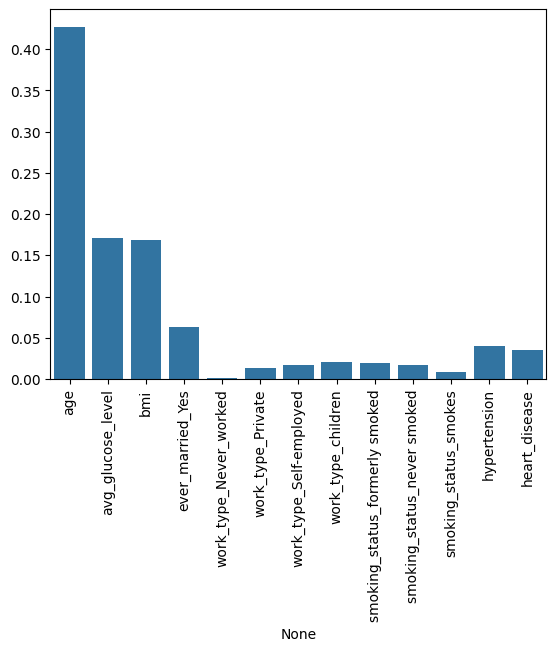

In [ ]:
sns.barplot(y=best_rf.feature_importances_,x=xtrain.columns)
plt.xticks(rotation=90)
plt.show()

In [ ]:
cross_val_score(best_rf,pd.DataFrame(pd.concat([xtrain,xtest])),pd.DataFrame(pd.concat([pd.DataFrame(ytrain),pd.DataFrame(ytest)])),cv=5,n_jobs=-1)

array([0.87279843, 0.87377691, 0.85518591, 0.85812133, 0.86287953])

#Naive- Bayes

In [ ]:
nb=GaussianNB()
nb.fit(xtrain,ytrain)
ypred=nb.predict(xtest)
print(accuracy_score(ytest,ypred))
print(f1_score(ytest,ypred))
print("ROC-AUC:", roc_auc_score(ytest, y_pred_test))

0.34148727984344424
0.13161290322580646
ROC-AUC: 0.7665535833282849


In [ ]:
ypred_train=nb.predict(xtrain)
print(accuracy_score(ytrain,ypred_train))
print(f1_score(ytrain,ypred_train))
print("ROC-AUC:", roc_auc_score(ytrain, ypred_train))

0.361634450697333
0.13062312562479172
ROC-AUC: 0.6597733571248614


#Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier(random_state=2)
param_grid = {
    'n_estimators':[50,100,200],
    'learning_rate':[0.01,0.1],
    'max_depth':[8,10,15,20,None],
    'subsample':[0.5,0.75,1]
}

# 4. GridSearchCV with F1-score
grid = GridSearchCV(gb, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=2)
grid.fit(xtrain, ytrain)

# 5. Best parameters
print("Best params:", grid.best_params_)
print("Best F1 (CV):", grid.best_score_)

# 6. Evaluate on test set
best_gb = grid.best_estimator_
y_prob_test = best_gb.predict_proba(xtest)[:,1]  # probabilities for positive class
s=[]
for threshold in np.linspace(start=0,stop=1,num=100):
  ypred=(y_prob_test>threshold).astype(int)
  s.append(roc_auc_score(ytest,ypred))
threshold=np.linspace(start=0,stop=1,num=100)[np.argmax(s)]
# Optional: Threshold tuning
y_pred_test = (y_prob_test > threshold).astype(int)

# 7. Metrics
f1 = f1_score(ytest, y_pred_test)
precision, recall, _ = precision_recall_curve(ytest, y_prob_test)
pr_auc = auc(recall, precision)
cm = confusion_matrix(ytest, y_pred_test)

y_prob_train = best_lr.predict_proba(xtrain)[:,1]
y_pred_train = (y_prob_train > threshold).astype(int)
print("\n--- Train Metrics ---")
print("Accuracy (train):", accuracy_score(ytrain, y_pred_train))
print("F1-score (train):", f1_score(ytrain, y_pred_train))
print("ROC-AUC (train):", roc_auc_score(ytrain, y_prob_train))  # use probabilities
print("\n--- Test Metrics ---")

print("F1-score:", f1)
print("PR-AUC:", pr_auc)
print("Confusion Matrix:\n", cm)
print("ROC-AUC:", roc_auc_score(ytest, y_pred_test))

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best params: {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 100, 'subsample': 1}
Best F1 (CV): 0.17740220115506156

--- Train Metrics ---
Accuracy (train): 0.05382921458282359
F1-score (train): 0.09289232934553132
ROC-AUC (train): 0.8456109046235042

--- Test Metrics ---
F1-score: 0.1016949152542373
PR-AUC: 0.11242740599469715
Confusion Matrix:
 [[910  61]
 [ 45   6]]
ROC-AUC: 0.5274126128309202


#XGBoost

In [ ]:
xgb=XGBClassifier(random_state=2,n_estimators=50, learning_rate=0.01,max_depth=8,colsample_bytree=0.75)
xgb.fit(xtrain,ytrain)
ypred=xgb.predict(xtest)
print(accuracy_score(ytest,ypred))
print(f1_score(ytest,ypred))
print("ROC-AUC:", roc_auc_score(ytest, ypred))

0.9500978473581213
0.0
ROC-AUC: 0.5


In [ ]:
ypred_train=xgb.predict(xtrain)
print(accuracy_score(ytrain,ypred_train))
print(f1_score(ytrain,ypred_train))
print("ROC-AUC:", roc_auc_score(ytrain, ypred_train))

0.9515537068754588
0.0
ROC-AUC: 0.5


#Voting Classifier

In [ ]:
vc=VotingClassifier(estimators=[('dt',best_dt),('rf',best_rf),('gb',gb)],voting='hard')
vc.fit(xtrain,ytrain)
ypred=vc.predict(xtest)
print(accuracy_score(ytest,ypred))
print(f1_score(ytest,ypred))
print("ROC-AUC:", roc_auc_score(ytest, ypred))

0.8659491193737769
0.2346368715083799
ROC-AUC: 0.6507845156600229


In [ ]:
ypred_train=vc.predict(xtrain)
print(accuracy_score(ytrain,ypred_train))
print(f1_score(ytrain,ypred_train))
print("ROC-AUC:", roc_auc_score(ytrain, ypred_train))

0.9080009787129925
0.4820936639118457
ROC-AUC: 0.8965347743311232


#Stacking Classifier

In [ ]:
sc=StackingClassifier(estimators=[('dt',best_dt),('rf',best_rf),('gb',best_gb)],final_estimator=DecisionTreeClassifier())
sc.fit(xtrain,ytrain)
ypred=sc.predict(xtest)
print(accuracy_score(ytest,ypred))
print(f1_score(ytest,ypred))
print("ROC-AUC:", roc_auc_score(ytest, ypred))

0.898238747553816
0.13333333333333333
ROC-AUC: 0.5470204559681752


In [ ]:
ypred_train=sc.predict(xtrain)
print(accuracy_score(ytrain,ypred_train))
print(f1_score(ytrain,ypred_train))
print("ROC-AUC:", roc_auc_score(ytrain, ypred_train))

0.9172987521409347
0.27155172413793105
ROC-AUC: 0.6329916547838892
